In [41]:
import numpy as np
import pandas as pd
import math 
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [99]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [100]:
X_train = X_train / 255
X_test = X_test / 255

In [44]:
print("First element of X_train is :")
X_train[0]

First element of X_train is :


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [45]:
print("First element of Y_train is :")
y_train[0]

First element of Y_train is :


5

In [46]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (60000, 28, 28)
The shape of y is: (60000,)


In [47]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [104]:
def drawImg(sample):               
    img=sample.reshape((28,28))    
    plt.imshow(img,cmap='gray')
    plt.show()


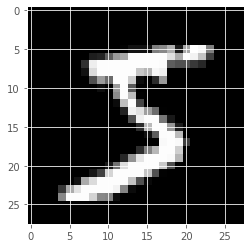

5


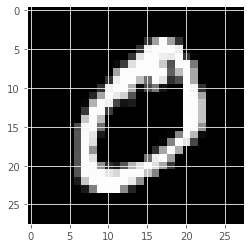

0


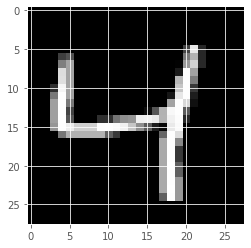

4


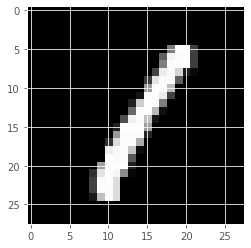

1


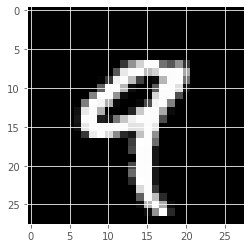

9


In [105]:
i=0
while i<5:
  drawImg(X_train[i])
  print(y_train[i])
  i+=1

In [106]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))


In [108]:
def knn(X, Y, query_point, k=5):
    vals=[]
    m=X_train.shape[0]
    
    for i in range(m):
        d=euclidean_distance(query_point, X[i])
        vals.append((d, Y[i])) 
            
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    new_vals=np.unique(vals[:, 1], return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [87]:
def calculate_accuracy(X_test, Y_test, X_train, Y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, Y_train, test_point)
        predictions.append(pred_label)
    predictions = np.array(predictions).astype(int)
    accuracy = 0
    for i in predictions:
      if(predictions[i] == Y_test[i]):
        accuracy += 1
    accuracy = accuracy / Y_test.shape[0]
    return accuracy

In [102]:
accuracy=calculate_accuracy(X_test,y_test,X_train,y_train,5)

print(accuracy)

0.98
